In [1]:
from skimage.transform import resize
from skimage.feature import hog
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [2]:
images = []
label = []

# Extract HoG features from pictures and assign labels
for index in range(1, 21):
  fileName = "BMW" + str(index) + ".png"
  img = cv2.imread(fileName, cv2.IMREAD_GRAYSCALE)
  # Detection window size is 128 x 128 pixels, so each image is resized
  resized_img = resize(img, (128, 128))
  # Orientation is 9 because gradient angles are quantized into 9 bins
  features, hog_image = hog(resized_img, orientations=9, pixels_per_cell=(8, 8),
                	cells_per_block=(2, 2), visualize=True)
  images.append(features)
  label.append(0)

for index in range(1, 21):
  fileName = "Benz" + str(index) + ".png"
  img = cv2.imread(fileName, cv2.IMREAD_GRAYSCALE)
  resized_img = resize(img, (128, 128))
  features, hog_image = hog(resized_img, orientations=9, pixels_per_cell=(8, 8),
                	cells_per_block=(2, 2), visualize=True)
  images.append(features)
  label.append(1)

for index in range(1, 21):
  fileName = "Tesla" + str(index) + ".png"
  img = cv2.imread(fileName, cv2.IMREAD_GRAYSCALE)
  resized_img = resize(img, (128, 128))
  features, hog_image = hog(resized_img, orientations=9, pixels_per_cell=(8, 8),
                	cells_per_block=(2, 2), visualize=True)
  images.append(features)
  label.append(2)

X = np.array(images)
y = np.array(label) 

# There will be 225 blocks (cells of 8 x 8 pixels and block size is 2 x 2 celss) and each with 36 features
# Total features for each training point is 8100
print(X.shape)
print(y.shape)

(60, 8100)
(60,)


In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

import tensorflow.keras.backend as K
K.clear_session()

In [4]:
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

nin = X_train.shape[1] # dimension of input data
nh = 1000 # number of hidden units
nout = 3 # number of outputs = 3 since there are 3 brands' logos

model = Sequential()
model.add(Dense(units=nh, input_shape=(nin,), activation='sigmoid', name='hidden'))
model.add(Dense(units=nout, activation='softmax', name='output'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden (Dense)              (None, 1000)              8101000   
                                                                 
 output (Dense)              (None, 3)                 3003      
                                                                 
Total params: 8,104,003
Trainable params: 8,104,003
Non-trainable params: 0
_________________________________________________________________


In [5]:
from tensorflow.keras import optimizers
opt = optimizers.Adam(learning_rate=0.03)

# Since this is a multiclass classification problem, we select the sparse_categorical_crossentropy loss
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
hist = model.fit(X_train, y_train, epochs=20, batch_size=8, validation_data=(X_test, y_test))

Epoch 1/20
6/6 [==============================] - 3s 381ms/step - loss: 11.9463 - accuracy: 0.4167 - val_loss: 14.7702 - val_accuracy: 0.2500
Epoch 2/20
6/6 [==============================] - 1s 139ms/step - loss: 10.9243 - accuracy: 0.3750 - val_loss: 2.6237 - val_accuracy: 0.6667
Epoch 3/20
6/6 [==============================] - 1s 159ms/step - loss: 3.9497 - accuracy: 0.6458 - val_loss: 1.7813 - val_accuracy: 0.3333
Epoch 4/20
6/6 [==============================] - 1s 108ms/step - loss: 1.3506 - accuracy: 0.5833 - val_loss: 1.6756 - val_accuracy: 0.6667
Epoch 5/20
6/6 [==============================] - 1s 106ms/step - loss: 0.8070 - accuracy: 0.7292 - val_loss: 0.8763 - val_accuracy: 0.6667
Epoch 6/20
6/6 [==============================] - 1s 105ms/step - loss: 0.3280 - accuracy: 0.8542 - val_loss: 0.2484 - val_accuracy: 0.9167
Epoch 7/20
6/6 [==============================] - 1s 105ms/step - loss: 0.1806 - accuracy: 0.8750 - val_loss: 0.2844 - val_accuracy: 0.9167
Epoch 8/20
6/6 [=

In [6]:
def identify_y_pred(input_array):
  if y_pred[0][0] == 1:
    print("Predicted as BMW")
  elif y_pred[0][1] == 1:
    print("Predicted as Benz")
  elif y_pred[0][2] == 1:
    print("Predicted as Tesla")
  else:
    print("Not sure")

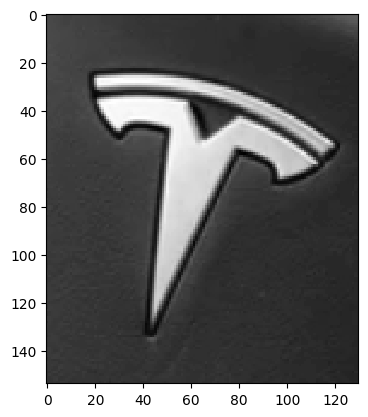

1/1 [==============================] - 0s 172ms/step
Predicted as Tesla
None


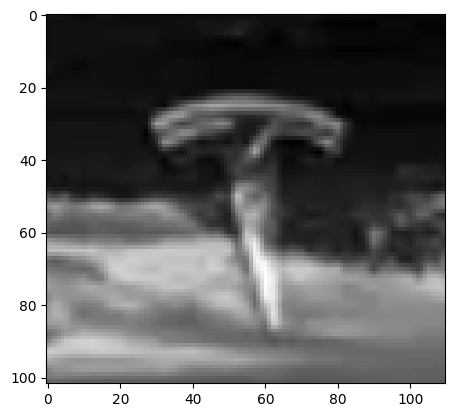

1/1 [==============================] - 0s 41ms/step
Predicted as Tesla
None


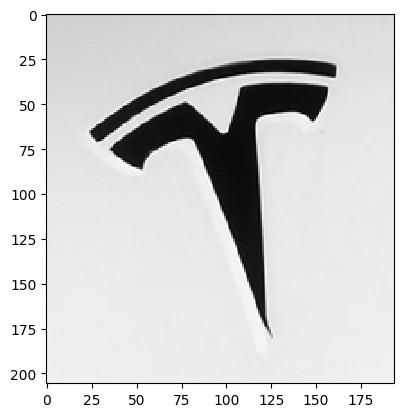

1/1 [==============================] - 0s 36ms/step
Predicted as Tesla
None


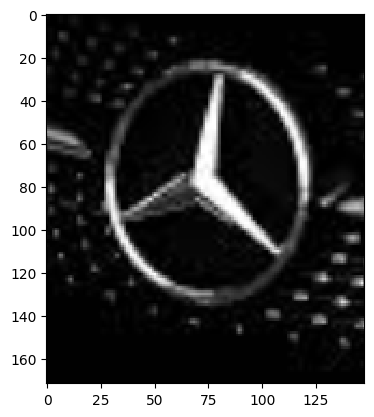

1/1 [==============================] - 0s 26ms/step
Predicted as Benz
None


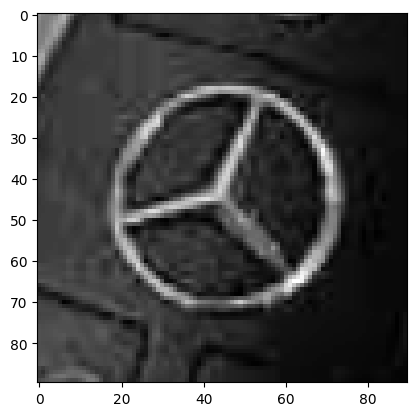

1/1 [==============================] - 0s 31ms/step
Predicted as Benz
None


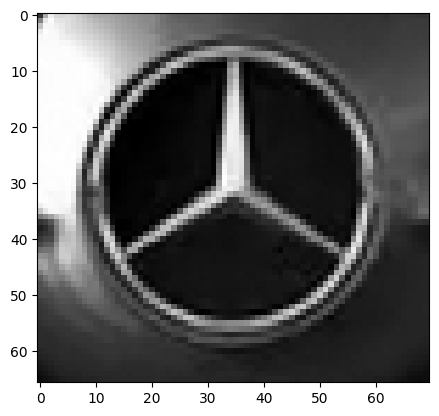

1/1 [==============================] - 0s 31ms/step
Predicted as Benz
None


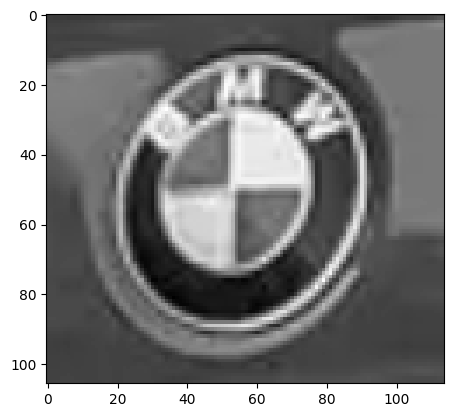

1/1 [==============================] - 0s 30ms/step
Predicted as BMW
None


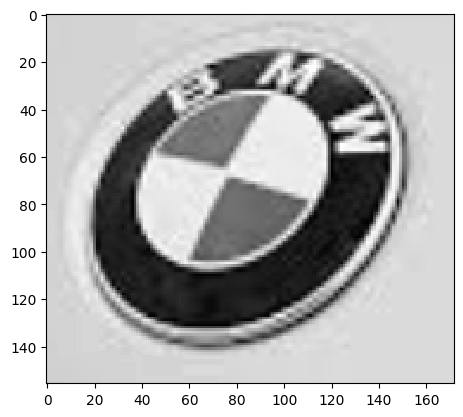

1/1 [==============================] - 0s 26ms/step
Predicted as BMW
None


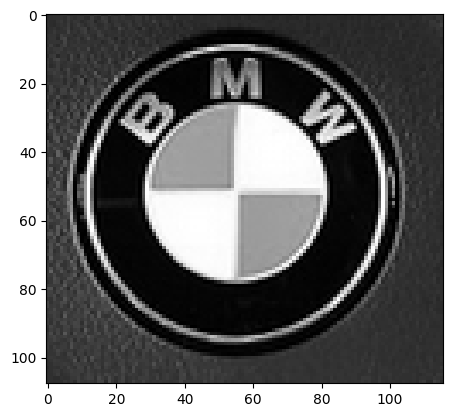

1/1 [==============================] - 0s 26ms/step
Predicted as BMW
None


In [7]:
# Iterate through test cases and give prediction for each test case
for index in range(1, 4):
  fileName = "Tesla_test" + str(index) + ".png"
  img = cv2.imread(fileName, cv2.IMREAD_GRAYSCALE)
  resized_img = resize(img, (128, 128))
  features, hog_image = hog(resized_img, orientations=9, pixels_per_cell=(8, 8),
                      cells_per_block=(2, 2), visualize=True)
  plt.imshow(img, interpolation='nearest', cmap='gray')
  plt.show()
  y_pred = model.predict(features.reshape(1,8100))
  y_pred = np.round(y_pred).astype(int)
  print(identify_y_pred(y_pred))

for index in range(1, 4):
  fileName = "Benz_test" + str(index) + ".png"
  img = cv2.imread(fileName, cv2.IMREAD_GRAYSCALE)
  resized_img = resize(img, (128, 128))
  features, hog_image = hog(resized_img, orientations=9, pixels_per_cell=(8, 8),
                      cells_per_block=(2, 2), visualize=True)
  plt.imshow(img, interpolation='nearest', cmap='gray')
  plt.show()
  y_pred = model.predict(features.reshape(1,8100))
  y_pred = np.round(y_pred).astype(int)
  print(identify_y_pred(y_pred))

for index in range(1, 4):
  fileName = "BMW_test" + str(index) + ".png"
  img = cv2.imread(fileName, cv2.IMREAD_GRAYSCALE)
  plt.imshow(img, interpolation='nearest', cmap='gray')
  plt.show()
  resized_img = resize(img, (128, 128))
  features, hog_image = hog(resized_img, orientations=9, pixels_per_cell=(8, 8),
                      cells_per_block=(2, 2), visualize=True)
  y_pred = model.predict(features.reshape(1,8100))
  y_pred = np.round(y_pred).astype(int)
  print(identify_y_pred(y_pred))